---
fig-cap-location: margin
code-fold: false
---


In [ ]:
import pandas as pd


train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [28]:
# Data Prep
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

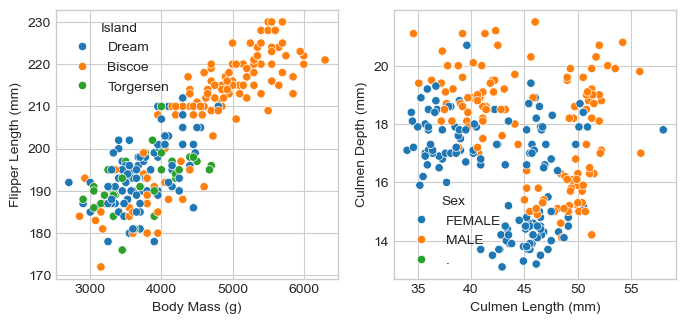

In [13]:
# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize = (8, 3.5))

qual = train[["Island", "Sex"]]

p1 = sns.scatterplot(X_train, x = "Body Mass (g)", y = "Flipper Length (mm)", hue= qual["Island"], ax = ax[0])
p2 = sns.scatterplot(X_train, x = "Culmen Length (mm)", y = "Culmen Depth (mm)", hue= qual["Sex"], ax = ax[1])

In [16]:
X_train.head() 

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


In [8]:
ft1 = X_train.drop(["Stage", "Sex", "Clutch Completion"], axis = 1)
ft1.groupby("Island").aggregate(['min', 'median', 'max'])

Culmen Length (mm)              Culmen Depth (mm)               \
                         min median   max               min median   max   
Island                                                                     
Biscoe                  34.5   45.5  55.9              13.1  15.30  21.1   
Dream                   34.0   45.4  58.0              16.4  18.20  21.2   
Torgersen               34.4   39.1  46.0              15.9  18.45  21.5   

          Flipper Length (mm)               Body Mass (g)                  \
                          min median    max           min  median     max   
Island                                                                      
Biscoe                  172.0  213.0  230.0        2850.0  4800.0  6300.0   
Dream                   178.0  193.0  212.0        2700.0  3700.0  4800.0   
Torgersen               176.0  192.0  210.0        2900.0  3737.5  4700.0   

          Delta 15 N (o/oo)                    Delta 13 C (o/oo)            \
                        min   median       max               min    median   
Island                                                                       
Biscoe              7.63220  8.36701   9.79532         -27.01854 -26.18466   
Dream               8.01485  9.23196  10.02544         -26.69543 -24.78984   
Torgersen           7.69778  8.89050   9.59462         -26.53870 -25.85627   

                     
                max  
Island               
Biscoe    -24.36130  
Dream     -23.89017  
Torgersen -23.90309

In [29]:
#Feature selection
from sklearn.feature_selection import VarianceThreshold

# ft2 = ft1.drop(["Island"], axis = 1)
sel = VarianceThreshold(0.8)
sel.fit_transform(X_train) 
sel.get_feature_names_out()

array(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)'], dtype=object)

In [30]:
from sklearn.linear_model import LogisticRegression

cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Island"]

LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
LR.score(X_train[cols], y_train)

KeyError: "['Island'] not in index"